<a href="https://colab.research.google.com/github/sanenchan/UAS-Machine-Learning/blob/main/UAS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re,string
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

import csv

In [17]:
consumer_key = "77FBm5yhuqaut06hqozP8O8EV"
consumer_secret_key ="g1KgZvx5uNWsxJE3wLVvwMYXlEHIYcPOmrBIwaIbbGmalr327T"
access_token = "1295686074971254784-MXtqxjOUQTiuqbApfUVFNcoe9xCPVb"
access_token_secret = "1I64e9Ch3n0vJSK8dEyVMMrFeskUovU7NXqxhQTOBml2i"

auth = tweepy.OAuthHandler(consumer_key,consumer_secret_key)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True) 

In [25]:
csvFile = open('uber.csv','a', encoding='utf-8')
csvWriter = csv.writer(csvFile)
for tweet in tweepy.Cursor(api.search, q= "#uber",count=100, 
                          lang='id').items(2000):
    print(tweet.text)
    csvWriter.writerow([tweet.text])

RT @edigital247: 🤣🤣🤣🤣 infact kuku ki me o!!! #uber from Owerri to Lagos!!! #tagafriend https://t.co/DGyoW4QYhL
RT @edigital247: 🤣🤣🤣🤣 infact kuku ki me o!!! #uber from Owerri to Lagos!!! #tagafriend https://t.co/DGyoW4QYhL
RT @edigital247: 🤣🤣🤣🤣 infact kuku ki me o!!! #uber from Owerri to Lagos!!! #tagafriend https://t.co/DGyoW4QYhL
🤣🤣🤣🤣 infact kuku ki me o!!! #uber from Owerri to Lagos!!! #tagafriend https://t.co/DGyoW4QYhL
🤣🤣🤣🤣 infact kuku ki me o!!! #uber from Owerri to Lagos!!! #tagafriend https://t.co/6IdW0Q9PG9
$UBER 100M ⚠️ #Uber https://t.co/CyaC8pQQhP
@AdemMetan #uber ah uber
RT @Urja_Sggscc: @Uber_India 

🇺🇲: Listening to music, minimal Conversation

🇮🇳: Aur bhaiya kitna kama lete ho? 

#Uber #America #India
RT @Urja_Sggscc: @Uber_India 

🇺🇲: Listening to music, minimal Conversation

🇮🇳: Aur bhaiya kitna kama lete ho? 

#Uber #America #India
RT @Urja_Sggscc: @Uber_India 

🇺🇲: Listening to music, minimal Conversation

🇮🇳: Aur bhaiya kitna kama lete ho? 

#Uber #America #India
RT

In [26]:
df = pd.read_csv("uber.csv", header=None)
df

,0
0,RT @edigital247: 🤣🤣🤣🤣 infact kuku ki me o!!! #...
1,RT @edigital247: 🤣🤣🤣🤣 infact kuku ki me o!!! #...
2,RT @edigital247: 🤣🤣🤣🤣 infact kuku ki me o!!! #...
3,🤣🤣🤣🤣 infact kuku ki me o!!! #uber from Owerri ...
4,🤣🤣🤣🤣 infact kuku ki me o!!! #uber from Owerri ...
...,...
2019,RT @Ronald_vanLoon: 10 #jobs that didn't exist...
2020,Our Icchedana superstar 'Nishi' wear mask and ...
2021,RT @Ronald_vanLoon: 10 #jobs that didn't exist...
2022,📢 GIVEAWAY IS UNDERWAY 👉👉 You can still win a ...


In [42]:
def praproses(teks):
    teks = re.sub(r'http\S+','',teks)
    teks = hapus_tanda(teks)
    teks = re.sub(r'#([^\s]+)', r'\1', teks) #hapus #tagger
    teks = re.sub('@[A-Za-z0-9]+', '',teks)  #hapus @
    teks = re.sub(r':([^\s]+)', r'\1', teks) #hapus #tagger
    teks = re.sub('RT[\s]+', '',teks)#hapus RT
    teks = re.sub('https?:\/\/\S+', '',teks)#hapus hyperlink
    teks = re.sub(r'\w*\d\w*', '',teks).strip()#hapus angka dan angka yang berada dalam string
    teks = hapus_katadouble(teks)#hapus repetisi karakter
    teks = teks.lower() #ubah jadi lower case
#     teks = to_kbbi(teks)
    return teks

def hapus_tanda(teks): 
    tanda_baca = set(string.punctuation)
    tanda_baca.update(['…'])
    teks = ''.join(ch for ch in teks if ch not in tanda_baca)
    return teks

def hapus_katadouble(s): 
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)

def kbbi(kata): # penyeragaman kata berdasarkan kbbi 
	#kbba = [kamus.strip('\n').strip('\r') for kamus in open('kamus\\kbba.txt')]
	kamus_kata = [kamus.strip('\n').strip('\r') for kamus in open('kbba.txt')]
	#ubah list menjadi dictionary 
	dic = {}
	for i in kamus_kata: 
		(key, val) = i.split('\t')
		dic[str(key)] = val
	#kbbi cocokan 
	final_string = ' '.join(str(dic.get(word, word)) for word in kata).split()
	return final_string

def to_kbbi(teks):
    teks = teks.split()
    teks = kbbi(teks)
    return teks

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop_w:
            final_text.append(i.strip())
    return " ".join(final_text)

def hapus_emoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#Removing the noisy text
def cleanText(text):
    text = remove_stopwords(text)
    text = praproses(text)
    text = hapus_emoji(text)
    return text

# Load stopword Bahasa Indonesia
stopword_id = pd.read_csv('stopword_id.csv', sep='\t', header=None)
stopword_id.columns = ['word']
stop_w = stopword_id['word'].to_list() #diubah ke list 
# print('ada' in stop_w) # test periksa kata di dalam list stop_w

# def cleanText(teks):
#     teks = re.sub('@[A-Za-z0-9]+', '',teks)  #hapus @
#     teks = re.sub(r'#([^\s]+)', r'\1', teks) #hapus #tagger
#     teks = re.sub('RT[\s]+', '',teks)#hapus RT
#     teks = re.sub('https?:\/\/\S+', '',teks)#hapus hyperlink
#     teks = teks.lower() #ubah jadi lower case
#     teks = re.sub(r"[-()\"#/@;:<>{}=~|.?,]", "", teks)
#     import string
#     killpunctuation = str.maketrans('', '', string.punctuation)
#     return teks

#Apply function on review column
df[0] = df[0].apply(cleanText)

df

,0,Polarity,Subjectivity
0,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.0,0.000000
1,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.0,0.000000
2,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.0,0.000000
3,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.0,0.000000
4,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.0,0.000000
...,...,...,...
2019,ronaldvanloon jobs that didnt exist years ago ...,0.0,0.000000
2020,our icchedana superstar nishi wear mask and wa...,0.0,0.000000
2021,ronaldvanloon jobs that didnt exist years ago ...,0.0,0.000000
2022,giveaway is underway you can still win a gift ...,0.6,0.633333


In [43]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity


df['Polarity'] = df[0].apply(getPolarity)
df['Subjectivity'] = df[0].apply(getSubjectivity)

df

,0,Polarity,Subjectivity
0,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.0,0.000000
1,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.0,0.000000
2,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.0,0.000000
3,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.0,0.000000
4,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.0,0.000000
...,...,...,...
2019,ronaldvanloon jobs that didnt exist years ago ...,0.0,0.000000
2020,our icchedana superstar nishi wear mask and wa...,0.0,0.000000
2021,ronaldvanloon jobs that didnt exist years ago ...,0.0,0.000000
2022,giveaway is underway you can still win a gift ...,0.6,0.633333


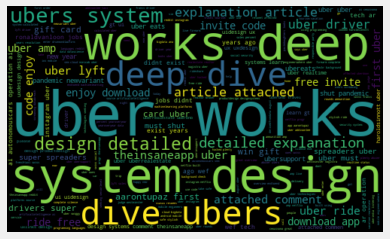

In [44]:
allWords =' '.join([twts for twts in df[0]])
wc = WordCloud(width = 500 , height = 300 , random_state=10, max_font_size=110).generate(allWords)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [45]:
#untuk menambahkan sentimen positif, negatif / netral dari polarity yg sudah dihitung
def getAnalysisSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
        
df['Analysis'] = df['Polarity'].apply(getAnalysisSentiment)

df

,0,Polarity,Subjectivity,Analysis
0,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.0,0.000000,Neutral
1,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.0,0.000000,Neutral
2,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.0,0.000000,Neutral
3,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.0,0.000000,Neutral
4,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.0,0.000000,Neutral
...,...,...,...,...
2019,ronaldvanloon jobs that didnt exist years ago ...,0.0,0.000000,Neutral
2020,our icchedana superstar nishi wear mask and wa...,0.0,0.000000,Neutral
2021,ronaldvanloon jobs that didnt exist years ago ...,0.0,0.000000,Neutral
2022,giveaway is underway you can still win a gift ...,0.6,0.633333,Positive


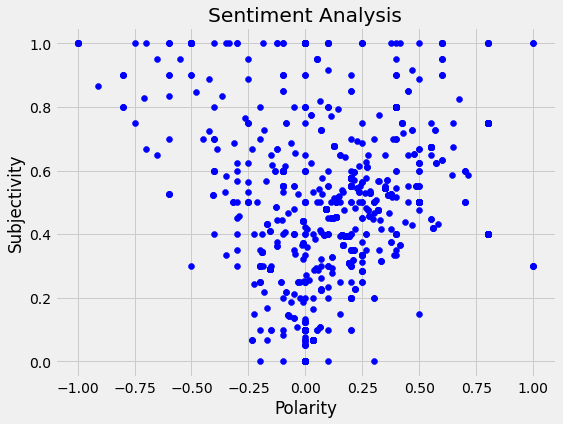

In [46]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color="Blue")
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [47]:
df['Analysis'].value_counts()

Positive    972
Neutral     742
Negative    310
Name: Analysis, dtype: int64

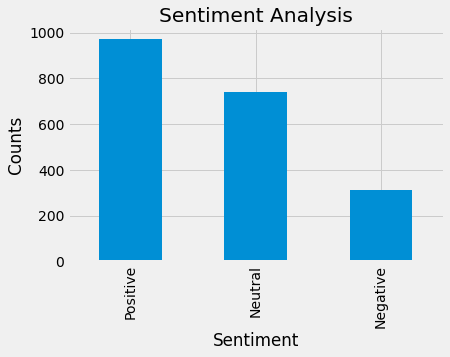

In [48]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind ='bar')
plt.show()